# Exploratory Data Analysis

## Importing Libraries and Dataset

In [1]:
#### Importing Libraries ####

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

## Explore the Data

In [2]:
dataset.head(5) # Viewing the Data

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [3]:
# Look at the names of the columns
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [4]:
# Look at the summary statistics of all the columns
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


## Data Preprocessing

In [5]:
# Cleaning Data
dataset[dataset.credit_score < 300]
dataset = dataset[dataset.credit_score >= 300]

In [6]:
# Removing NaN
# Only give us the columns that have an nan value
dataset.isna().any()
# Gives us the number of nans per column
dataset.isna().sum()
# Only take the rows from age that have a number value
dataset = dataset[pd.notnull(dataset["age"])]
# Credit_score and rewards_earned have many nan values
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

## Visualize with Histograms

KeyboardInterrupt: 

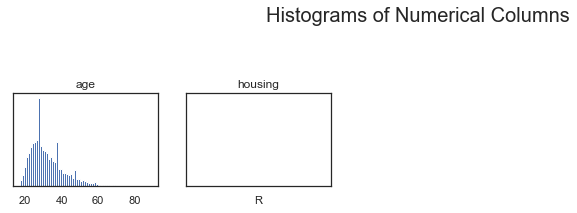

In [25]:
## Histograms

# Drop the user idenifier and churn(dependent variable) since we do not want to plot them on a histogram
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
# Give title
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
# For each entry in the dataset (+1 so that it includes the last entry)
for i in range(1, dataset2.shape[1] + 1):
    # Will have 6 rows and 5 columns of plots
    plt.subplot(6, 5, i)
    f = plt.gca()
    # Get rid of y_labels
    f.axes.get_yaxis().set_visible(False)
    # Set a title for each plot
    f.set_title(dataset2.columns.values[i - 1])
    # Get all the unique values for the row and we have that many bins
    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals), color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

## Visualize with Pie Plots

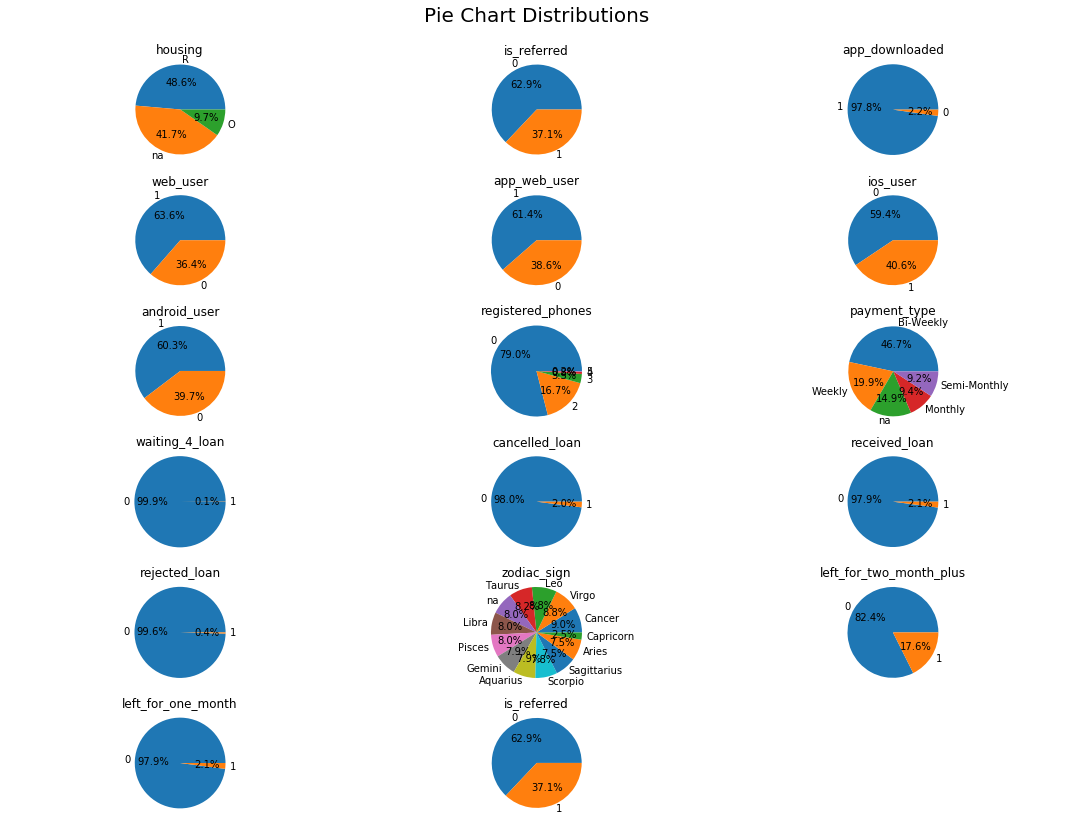

In [8]:
## Pie Plots
# Only use the binary variables
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
# Put a title
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    # Use 6 by 3 since there are only 17 variables
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
    # Get all the rows as percentages
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    # Get all the labels of the binary columns
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    # Build pie charts
    """Parameters:
    labels-indexes to label the chart
    autopct-We want our data displayed as 1 decimal percents"""
    plt.pie(values, labels = index, autopct='%1.1f%%')
    # This does not display the x and y labels; will display the pie charts by themselves
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


## Exploring Uneven Features

In [9]:
## Exploring Uneven Features

# Get the churn distribution when the waiting_4_loan value is 1; results (27:8; we cannot assume bias)
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()
# Get the churn distribution when the cancelled_loan value is 1; results(we cannot assume bias)
dataset[dataset2.cancelled_loan == 1].churn.value_counts()
# Get the churn distribution when the recieved_loan value is 1; results (we cannot assume bias)
dataset[dataset2.received_loan == 1].churn.value_counts()
# Get the churn distribution when the rejected_loan value is 1; results (we cannot assume bias)
dataset[dataset2.rejected_loan == 1].churn.value_counts()
# Get the churn distribution when the left_for_one_month value is 1; results (27:8; we cannot assume bias)
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

## Get the Corrleation between Explanatory Variables

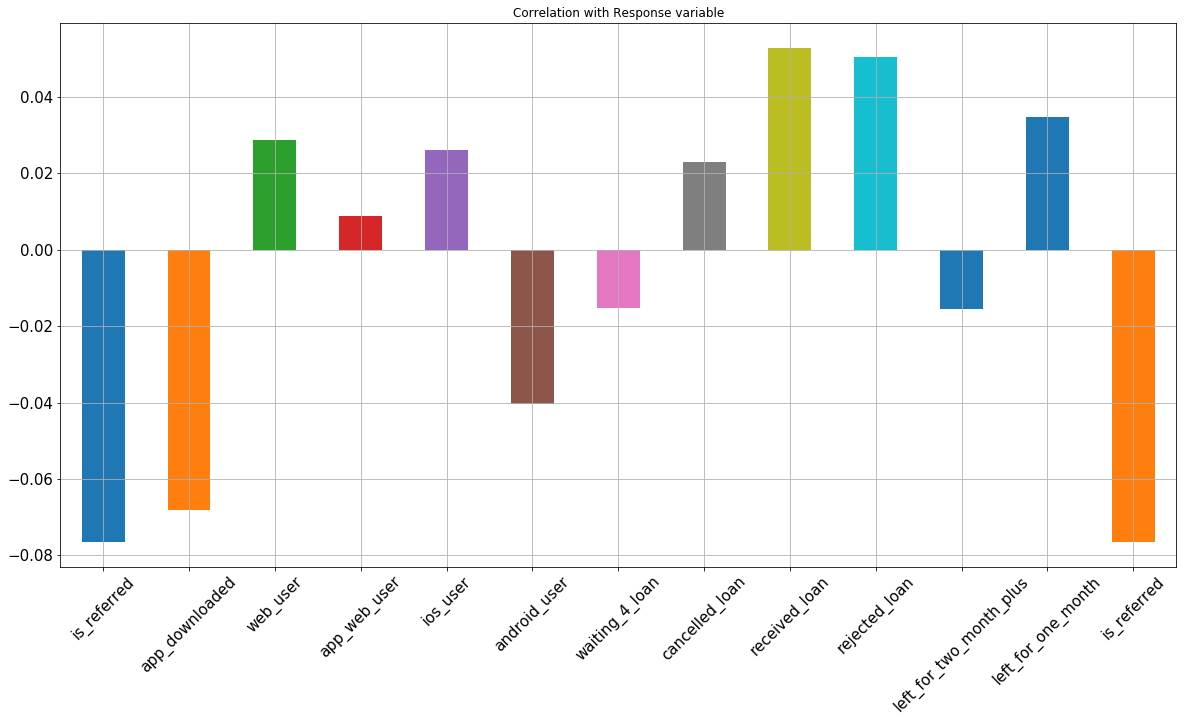

In [10]:
## Correlation with Response Variable
# Drop the irrelevant columns from the dataset
# Find the correlation with the dependent variable (churn) and plot on a bar graph
"""Parameters:figsize-size of the graph
              title-title
              fontsize
              rot-45 so x axis labels are on a 45 degree angle
              grid-plots bar graph on grid lines"""
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

## Create the Correlation Matrix

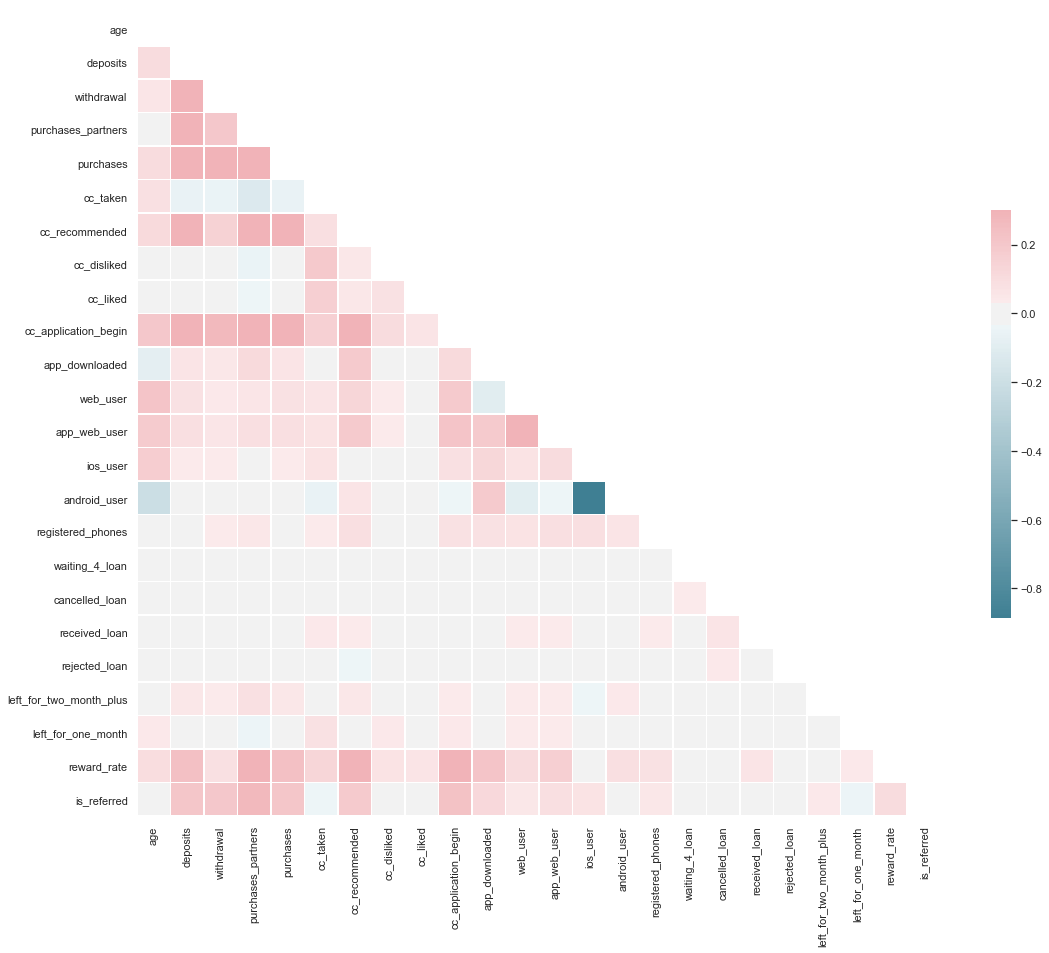

In [11]:
# Create white background
sn.set(style="white")

# Get the correlation between the explanatory variables
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle since it is symmetric so we only need half
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Removing Correlated Fields and saving new dataset

In [12]:
# Removing Correlated Fields since app_web_user is very correlated with other explanatory variables
dataset = dataset.drop(columns = ['app_web_user'])

## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

dataset.to_csv('new_churn_data.csv', index = False)